In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings("ignore")


from functions_anton.functions_cleaning import outliers_cut, date_format, encode_date, residual_price
from functions_anton.functions_plotting import plot_weekday_comp, plot_weekdays, plot_diffstat_city, plot_diffstat, plot_comp_days

In [2]:
df_fw = pd.read_parquet('data/fuerstenwalde_23-25.parquet')
df_mb = pd.read_parquet('data/muencheberg_23-25.parquet')
df_hh = pd.read_parquet('data/hamburg_23-25.parquet')
df_wh = pd.read_parquet('data/wertheim_23-25.parquet')

In [ ]:
df_fw = outliers_cut(df_fw)
df_mb = outliers_cut(df_mb)
df_hh = outliers_cut(df_hh)
df_wh = outliers_cut(df_wh)

date_format(df_fw)
date_format(df_mb)
date_format(df_hh)
date_format(df_wh)

encode_date(df_fw)
encode_date(df_mb)
encode_date(df_hh)
encode_date(df_wh)

df_fw = residual_price(df_fw, 1)
df_mb = residual_price(df_mb, 1)
df_hh = residual_price(df_hh, 1)
df_wh = residual_price(df_wh, 1)

In [ ]:
df_mb.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,...,openingtimes_json,year,month,week,dayNr,day,hour,minute,time,date_only
0,2023-01-01 03:54:09,752a477f-561f-488f-92bb-2c981cadf766,1.859,1.799,1.739,0,1,1,Shell Muencheberg Karl-Marx-Str. 40,Shell,...,"{""overrides"":[{""startp"":""2025-05-31 06:00"",""en...",2023,1,52,1,Sunday,3,54,3.900000,2023-01-01
1,2023-01-01 06:31:07,752a477f-561f-488f-92bb-2c981cadf766,2.039,1.959,1.899,1,1,1,Shell Muencheberg Karl-Marx-Str. 40,Shell,...,"{""overrides"":[{""startp"":""2025-05-31 06:00"",""en...",2023,1,52,1,Sunday,6,31,6.516667,2023-01-01
2,2023-01-01 07:21:07,752a477f-561f-488f-92bb-2c981cadf766,1.959,1.859,1.799,1,1,1,Shell Muencheberg Karl-Marx-Str. 40,Shell,...,"{""overrides"":[{""startp"":""2025-05-31 06:00"",""en...",2023,1,52,1,Sunday,7,21,7.350000,2023-01-01
3,2023-01-01 08:18:09,752a477f-561f-488f-92bb-2c981cadf766,1.819,1.759,1.699,1,1,1,Shell Muencheberg Karl-Marx-Str. 40,Shell,...,"{""overrides"":[{""startp"":""2025-05-31 06:00"",""en...",2023,1,52,1,Sunday,8,18,8.300000,2023-01-01
4,2023-01-01 09:01:07,752a477f-561f-488f-92bb-2c981cadf766,1.879,1.819,1.759,1,1,1,Shell Muencheberg Karl-Marx-Str. 40,Shell,...,"{""overrides"":[{""startp"":""2025-05-31 06:00"",""en...",2023,1,52,1,Sunday,9,1,9.016667,2023-01-01


In [ ]:
df_fw.head()

,station_uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,...,e10change,year,month,week,dayNr,day,hour,minute,time,date_only
0,f97bcef8-619c-4ac4-bf9d-35995dea884e,Aral Tankstelle,ARAL,Triftstraße,36,15517,Fürstenwalde,52.378353,14.073492,2014-03-18 16:45:31+01,...,0.0,2023,1,52,1,Sunday,6,31,6.516667,2023-01-01
1,f97bcef8-619c-4ac4-bf9d-35995dea884e,Aral Tankstelle,ARAL,Triftstraße,36,15517,Fürstenwalde,52.378353,14.073492,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,8,1,8.016667,2023-01-01
2,f97bcef8-619c-4ac4-bf9d-35995dea884e,Aral Tankstelle,ARAL,Triftstraße,36,15517,Fürstenwalde,52.378353,14.073492,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,8,5,8.083333,2023-01-01
3,f97bcef8-619c-4ac4-bf9d-35995dea884e,Aral Tankstelle,ARAL,Triftstraße,36,15517,Fürstenwalde,52.378353,14.073492,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,8,40,8.666667,2023-01-01
4,f97bcef8-619c-4ac4-bf9d-35995dea884e,Aral Tankstelle,ARAL,Triftstraße,36,15517,Fürstenwalde,52.378353,14.073492,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,9,48,9.800000,2023-01-01


In [ ]:
df_hh.head()

,station_uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,...,e10change,year,month,week,dayNr,day,hour,minute,time,date_only
0,4e107a8d-8449-5853-bd25-247225202e98,Hamburg,Hoyer,Norderquerweg,15,21037,Hamburg,53.436066,10.190469,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,6,40,6.666667,2023-01-01
1,4e107a8d-8449-5853-bd25-247225202e98,Hamburg,Hoyer,Norderquerweg,15,21037,Hamburg,53.436066,10.190469,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,8,43,8.716667,2023-01-01
2,4e107a8d-8449-5853-bd25-247225202e98,Hamburg,Hoyer,Norderquerweg,15,21037,Hamburg,53.436066,10.190469,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,9,31,9.516667,2023-01-01
3,4e107a8d-8449-5853-bd25-247225202e98,Hamburg,Hoyer,Norderquerweg,15,21037,Hamburg,53.436066,10.190469,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,11,31,11.516667,2023-01-01
4,4e107a8d-8449-5853-bd25-247225202e98,Hamburg,Hoyer,Norderquerweg,15,21037,Hamburg,53.436066,10.190469,2014-03-18 16:45:31+01,...,1.0,2023,1,52,1,Sunday,12,34,12.566667,2023-01-01


In [ ]:
df_wh.head()

,station_uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,...,e10change,year,month,week,dayNr,day,hour,minute,time,date_only
0,1f05bb14-660c-4566-8ef7-5be9bcaf7ced,Philipp Diehm GmbH,freie Tankstelle,Hauptstr.,2a,97877,Wertheim,49.771121,9.562466,2014-03-18 16:45:31+01,...,1.0,2023,1,1,2,Monday,8,19,8.316667,2023-01-02
1,1f05bb14-660c-4566-8ef7-5be9bcaf7ced,Philipp Diehm GmbH,freie Tankstelle,Hauptstr.,2a,97877,Wertheim,49.771121,9.562466,2014-03-18 16:45:31+01,...,1.0,2023,1,1,2,Monday,12,19,12.316667,2023-01-02
2,1f05bb14-660c-4566-8ef7-5be9bcaf7ced,Philipp Diehm GmbH,freie Tankstelle,Hauptstr.,2a,97877,Wertheim,49.771121,9.562466,2014-03-18 16:45:31+01,...,1.0,2023,1,1,2,Monday,14,56,14.933333,2023-01-02
3,1f05bb14-660c-4566-8ef7-5be9bcaf7ced,Philipp Diehm GmbH,freie Tankstelle,Hauptstr.,2a,97877,Wertheim,49.771121,9.562466,2014-03-18 16:45:31+01,...,1.0,2023,1,1,7,Saturday,8,43,8.716667,2023-01-07
4,1f05bb14-660c-4566-8ef7-5be9bcaf7ced,Philipp Diehm GmbH,freie Tankstelle,Hauptstr.,2a,97877,Wertheim,49.771121,9.562466,2014-03-18 16:45:31+01,...,0.0,2023,1,2,9,Monday,8,31,8.516667,2023-01-09


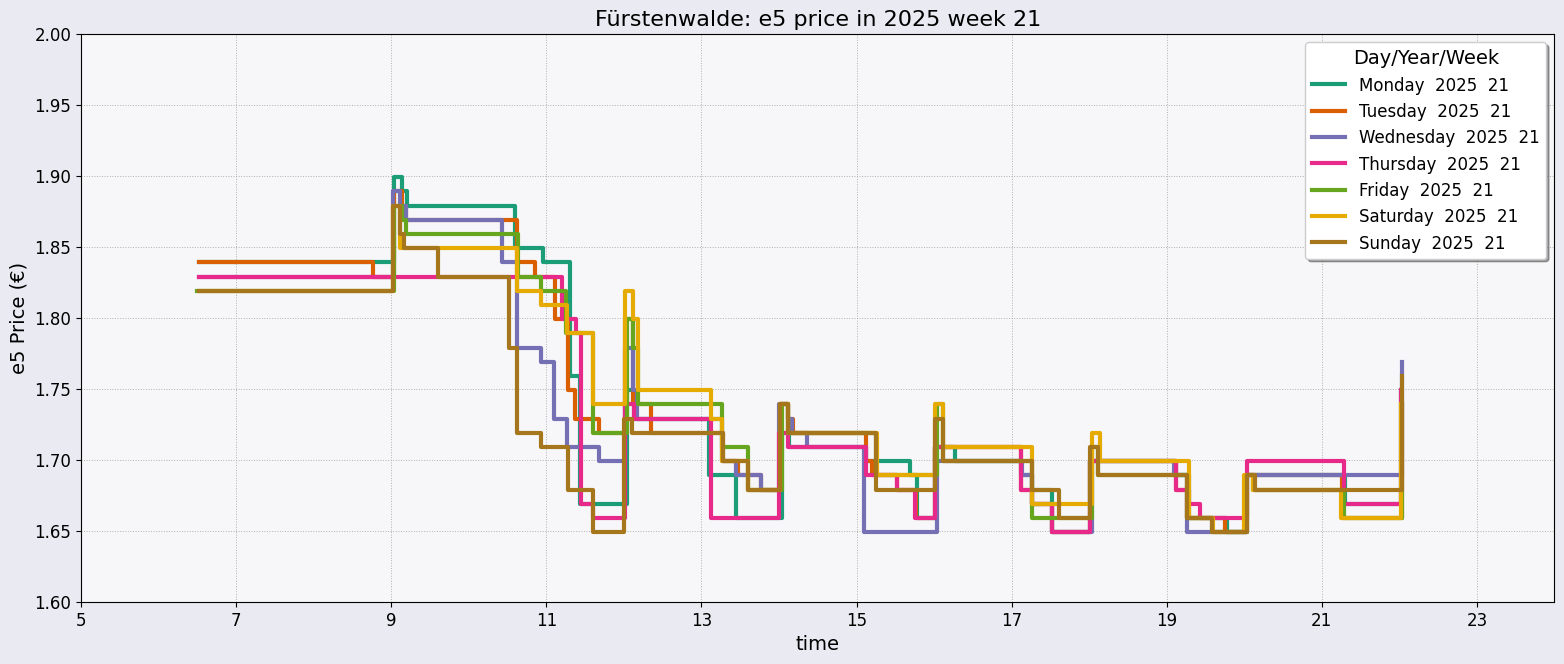

In [ ]:
plot_weekday_comp(df_fw, 2025, 21 , 'ca59821d-9be3-4716-81e8-9aba1bca33d5', analyzer = 'e5')

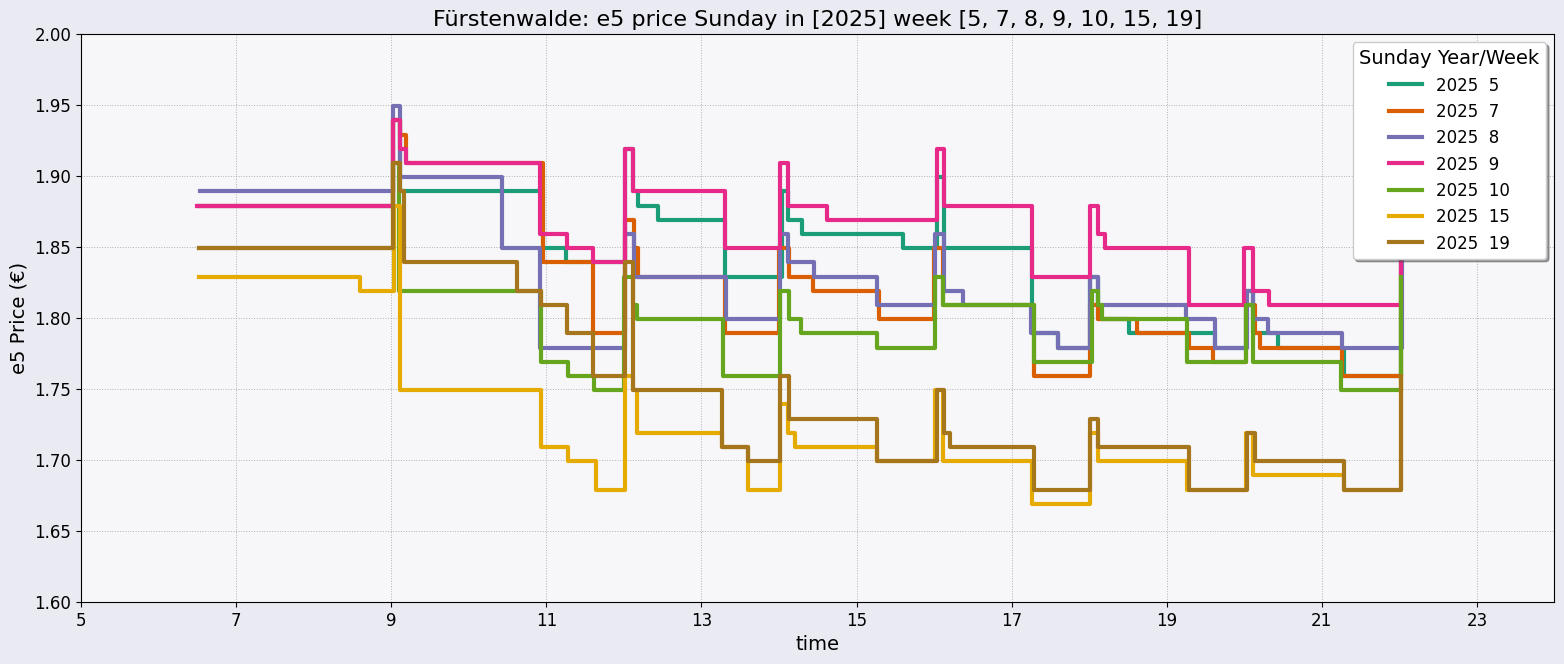

In [ ]:
plot_weekdays(df_fw, [2025],[5,7,8,9,10,15,19], 'Sunday', 'ca59821d-9be3-4716-81e8-9aba1bca33d5', analyzer = 'e5')

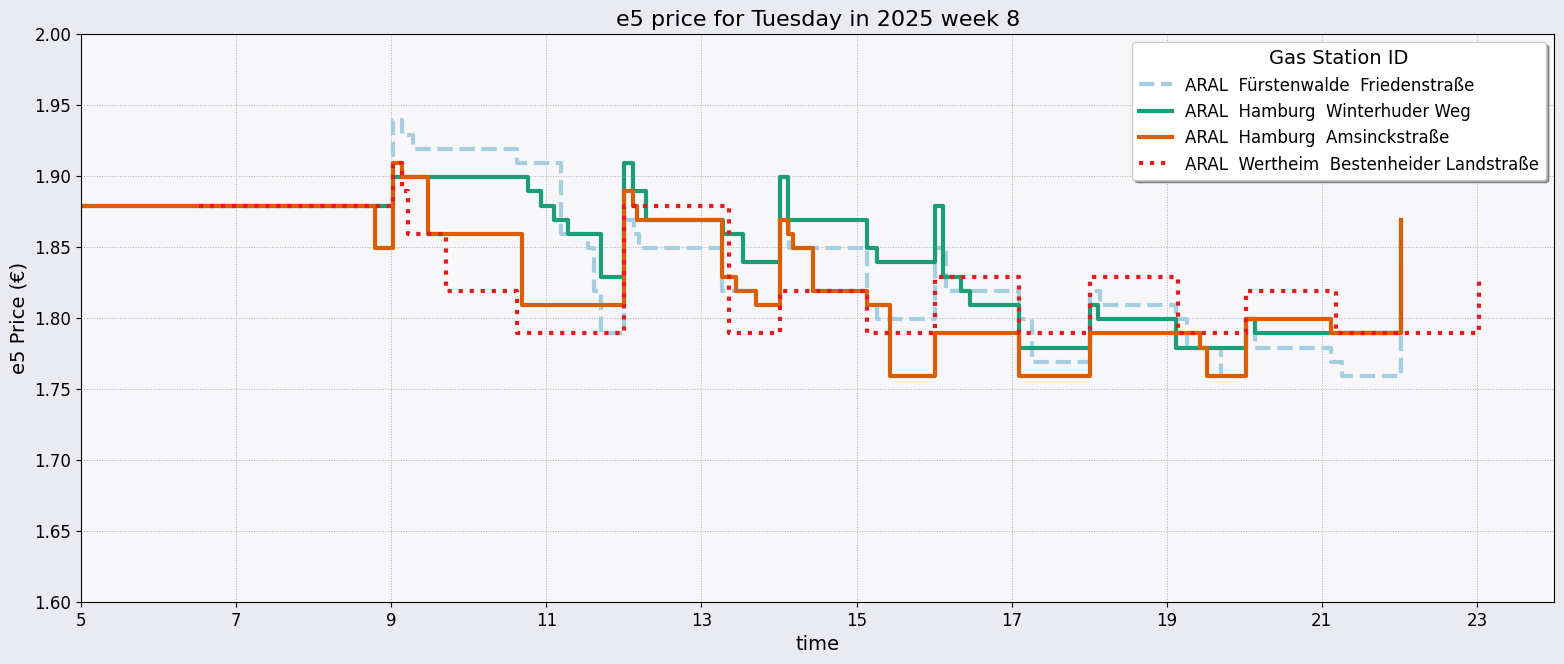

In [ ]:
plot_diffstat_city(df_fw, df_hh, df_wh, 2025,8, 'Tuesday', [ 'ca59821d-9be3-4716-81e8-9aba1bca33d5'], ['02c3a06b-41c8-4c6a-87ca-32223c52df3a','08386c5e-29e9-4e40-ab34-ea2107e8eddf'] , ['fb0f8030-c1eb-4df1-9410-054eea7422ad'] ,analyzer = 'e5')

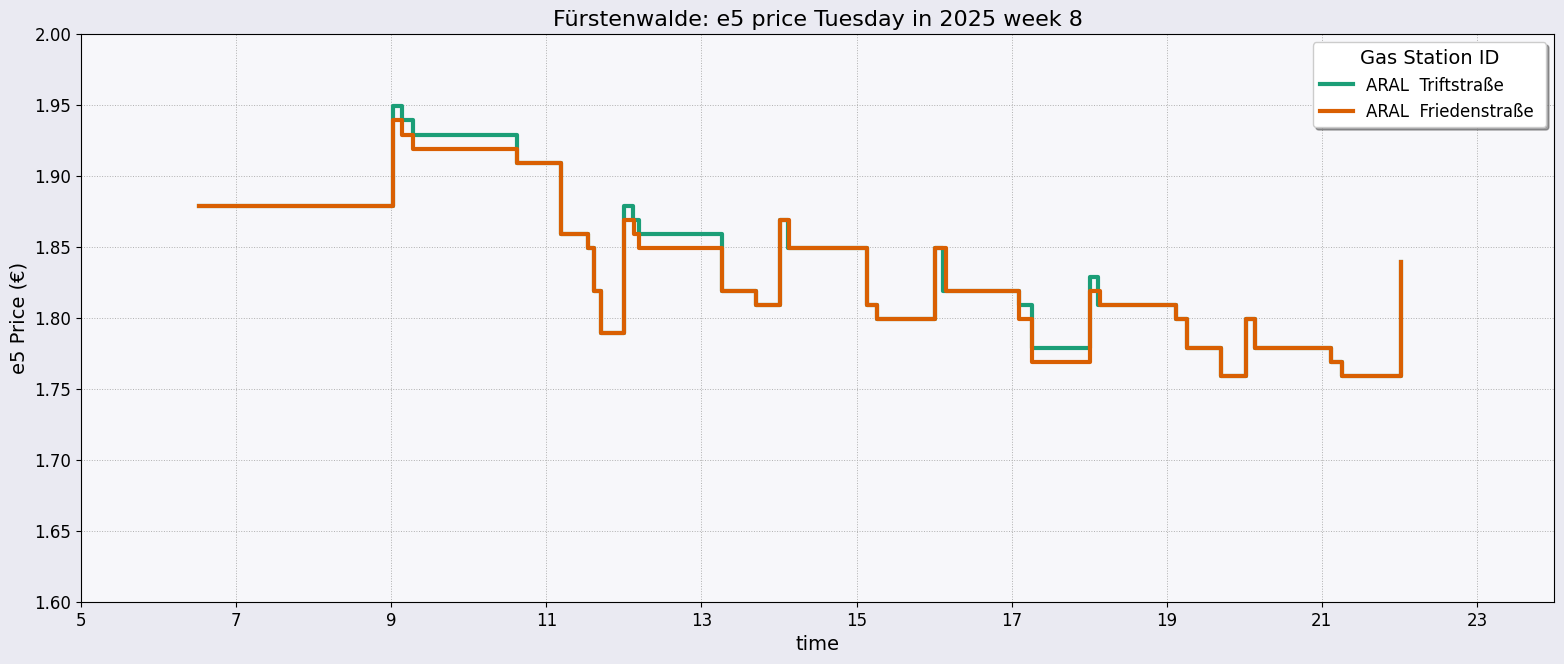

In [ ]:
plot_diffstat(df_fw,2025,8, 'Tuesday', ['f97bcef8-619c-4ac4-bf9d-35995dea884e', 'ca59821d-9be3-4716-81e8-9aba1bca33d5'], analyzer = 'e5')

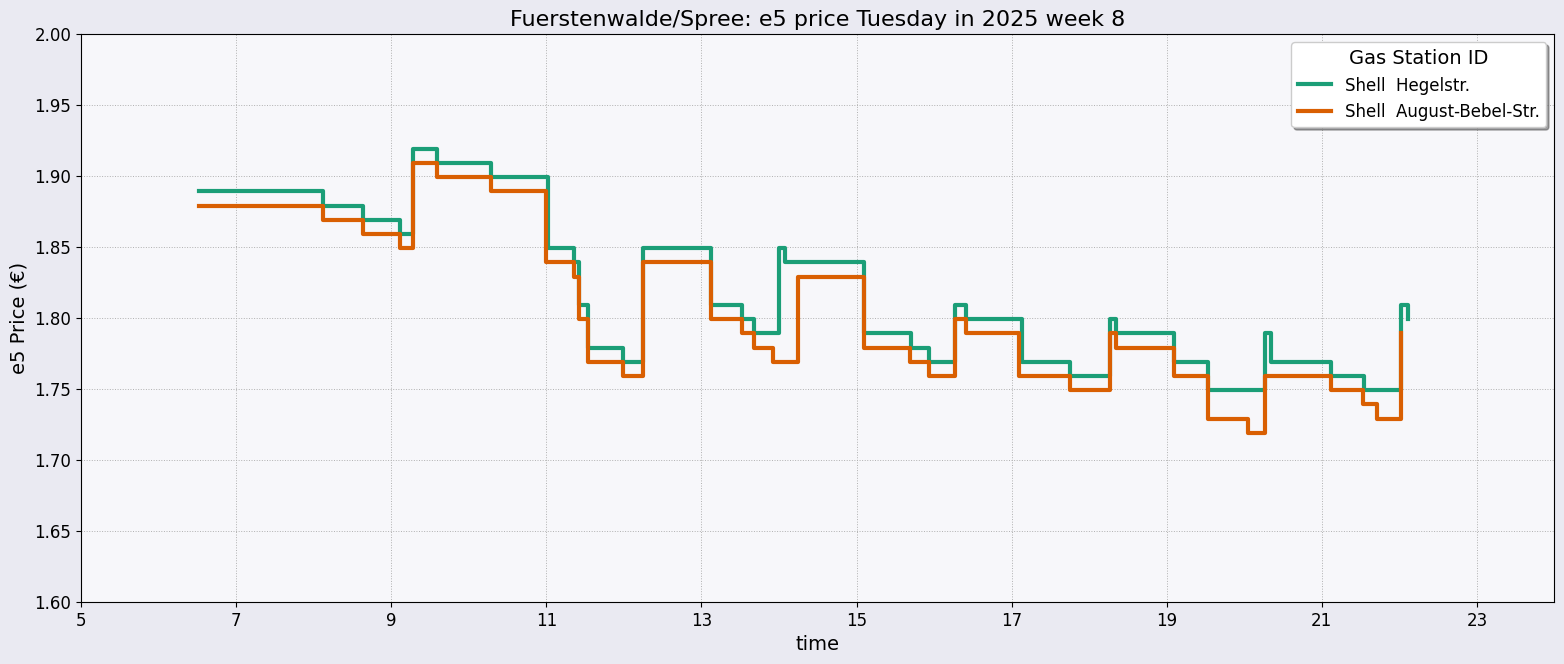

In [ ]:
plot_diffstat(df_fw,2025,8,'Tuesday', ['7d5fad20-67bc-4970-b576-4e3fb371e48e', '3ca5f739-7334-4e9e-8a26-f9e175d3d57f'], analyzer = 'e5')

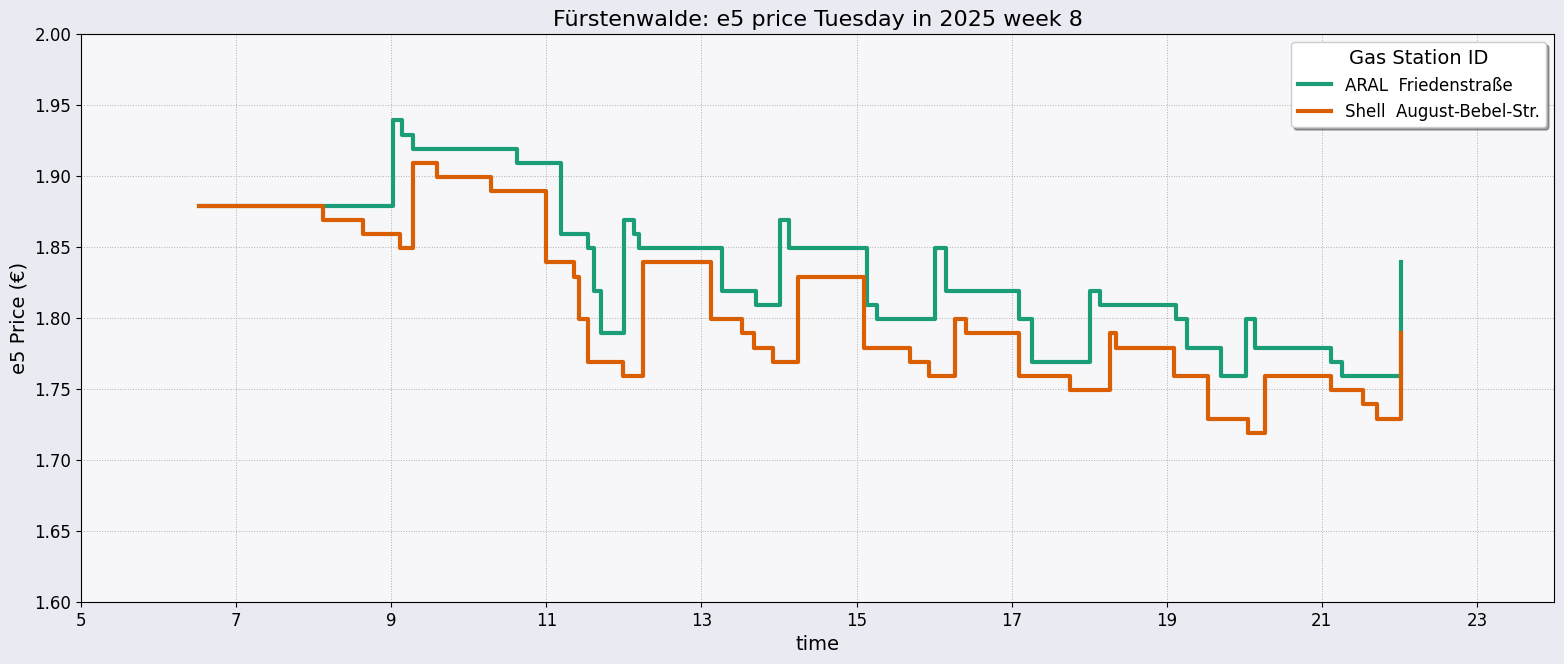

In [ ]:
plot_diffstat(df_fw,2025,8,'Tuesday', ['ca59821d-9be3-4716-81e8-9aba1bca33d5', '3ca5f739-7334-4e9e-8a26-f9e175d3d57f'], analyzer = 'e5')

In [ ]:
print(df_fw['station_uuid'].unique())

['f97bcef8-619c-4ac4-bf9d-35995dea884e'
 'ca59821d-9be3-4716-81e8-9aba1bca33d5'
 '7d5fad20-67bc-4970-b576-4e3fb371e48e'
 '8f5d17e2-2560-4e21-9b64-49adb3e974bd'
 '3ca5f739-7334-4e9e-8a26-f9e175d3d57f'
 '89c931b5-2ddd-4a90-969e-ae250143ddf3'
 '8f0412d2-df04-4eef-86e3-132ed6c8238a']


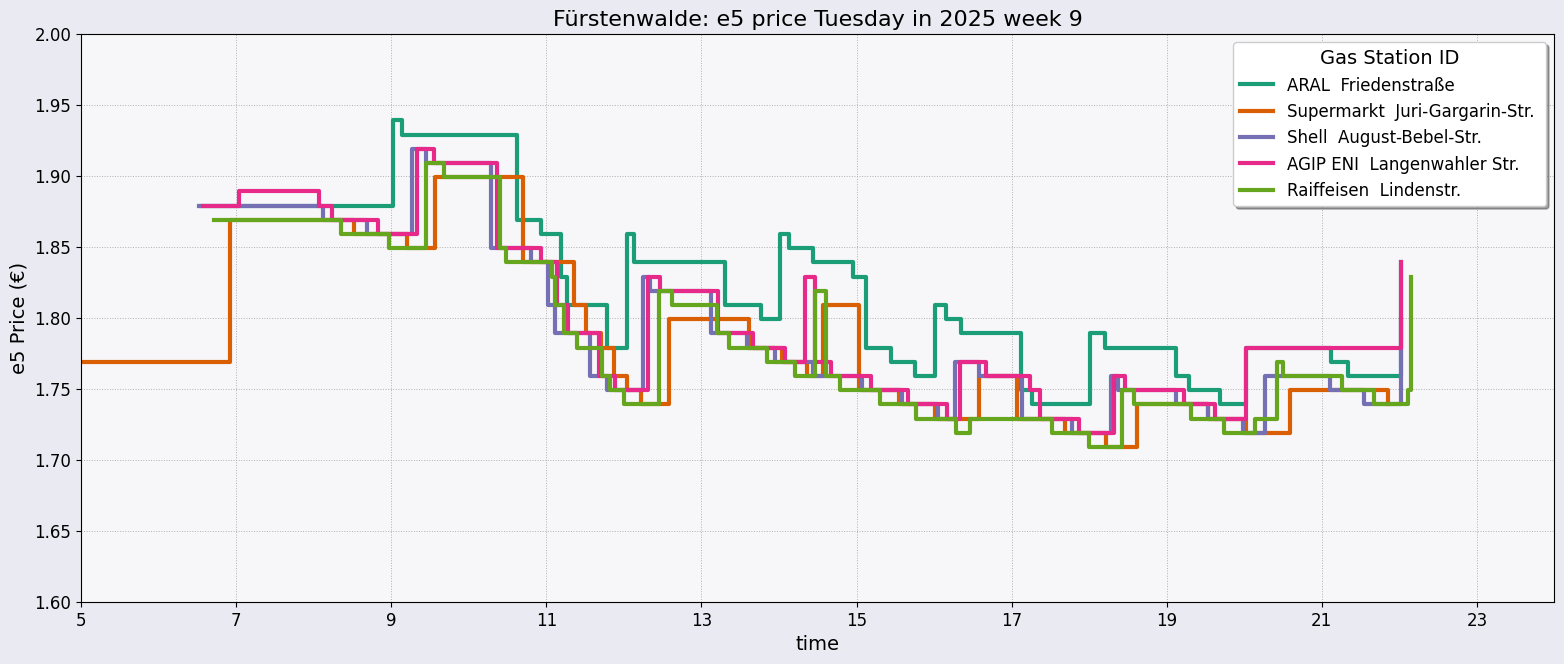

In [ ]:
plot_diffstat(df_fw,2025,9,'Tuesday', ['ca59821d-9be3-4716-81e8-9aba1bca33d5', '3ca5f739-7334-4e9e-8a26-f9e175d3d57f','89c931b5-2ddd-4a90-969e-ae250143ddf3', '8f0412d2-df04-4eef-86e3-132ed6c8238a', '8f5d17e2-2560-4e21-9b64-49adb3e974bd'], analyzer = 'e5')

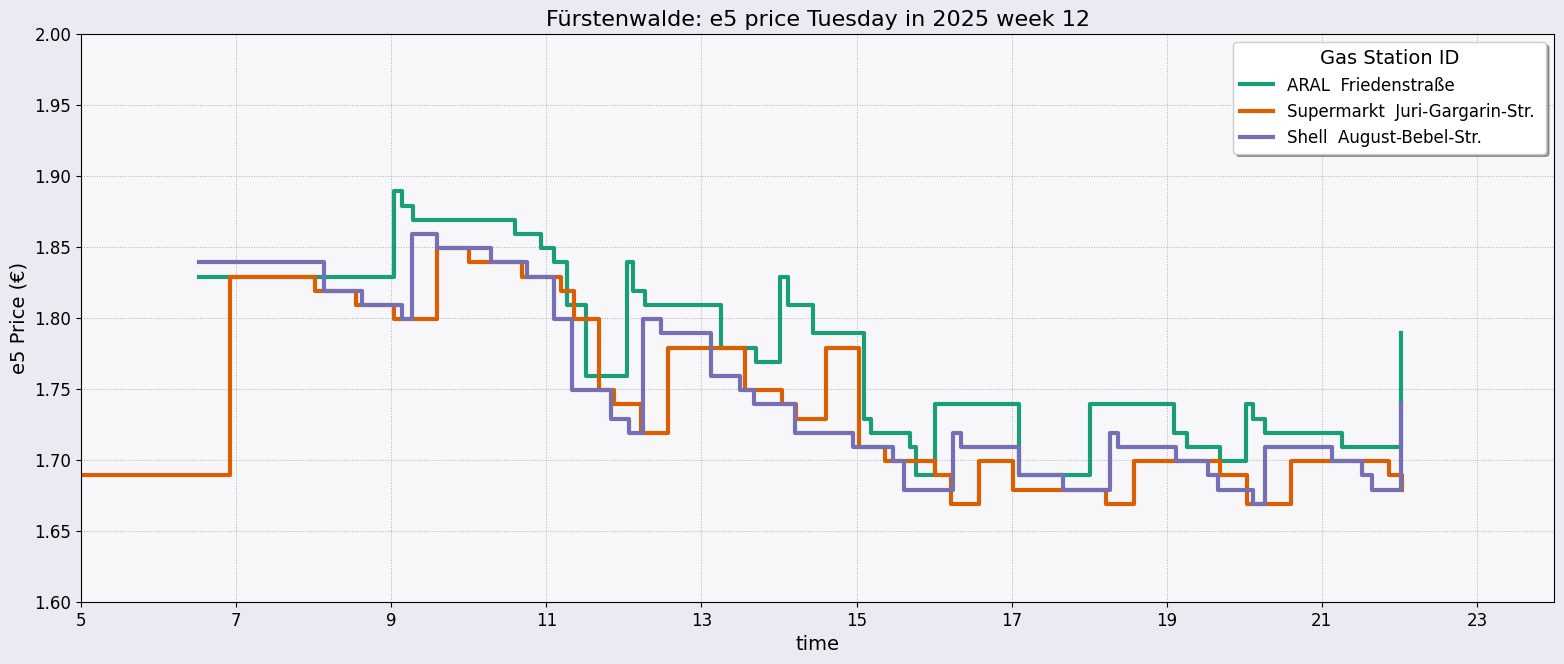

In [ ]:
plot_diffstat(df_fw,2025,12,'Tuesday', ['ca59821d-9be3-4716-81e8-9aba1bca33d5', '3ca5f739-7334-4e9e-8a26-f9e175d3d57f','8f5d17e2-2560-4e21-9b64-49adb3e974bd'], analyzer = 'e5')

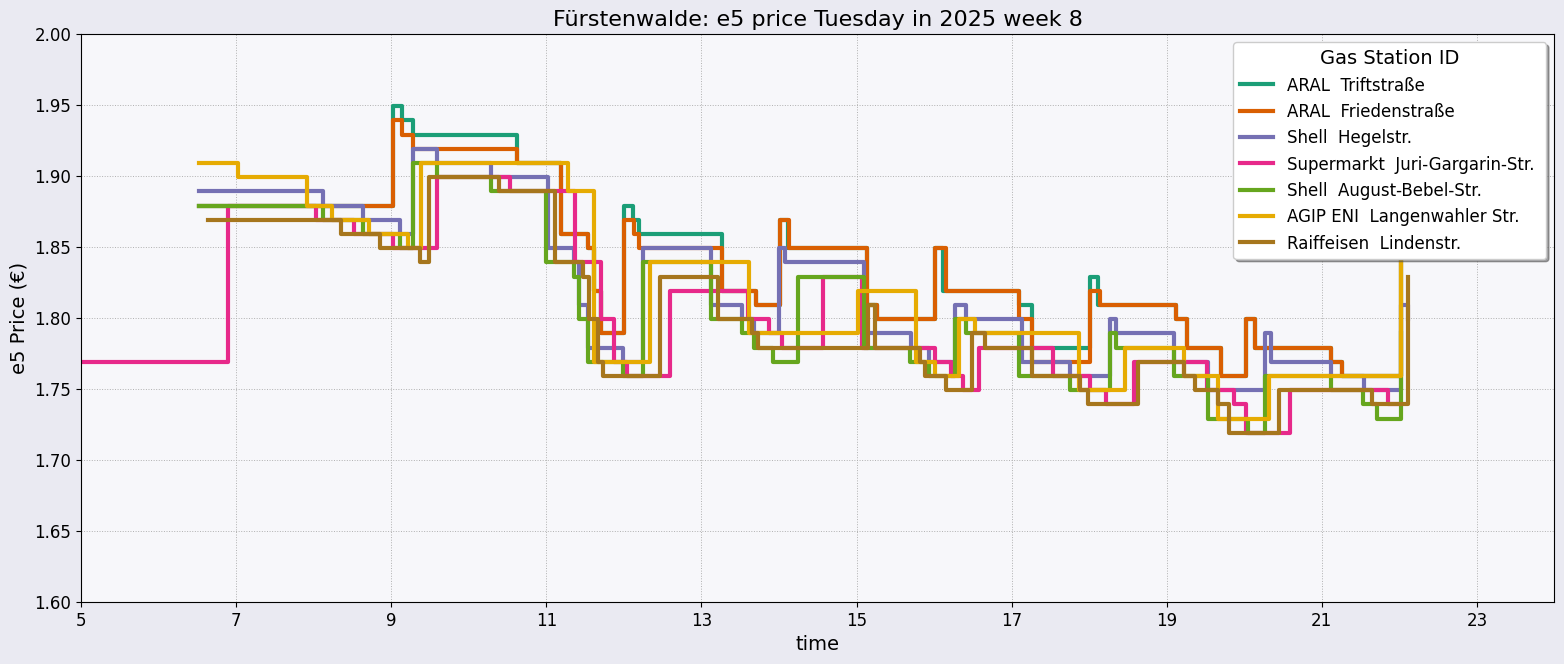

In [ ]:
plot_diffstat(df_fw,2025,8,'Tuesday', list(df_fw['station_uuid'].unique()), analyzer = 'e5')

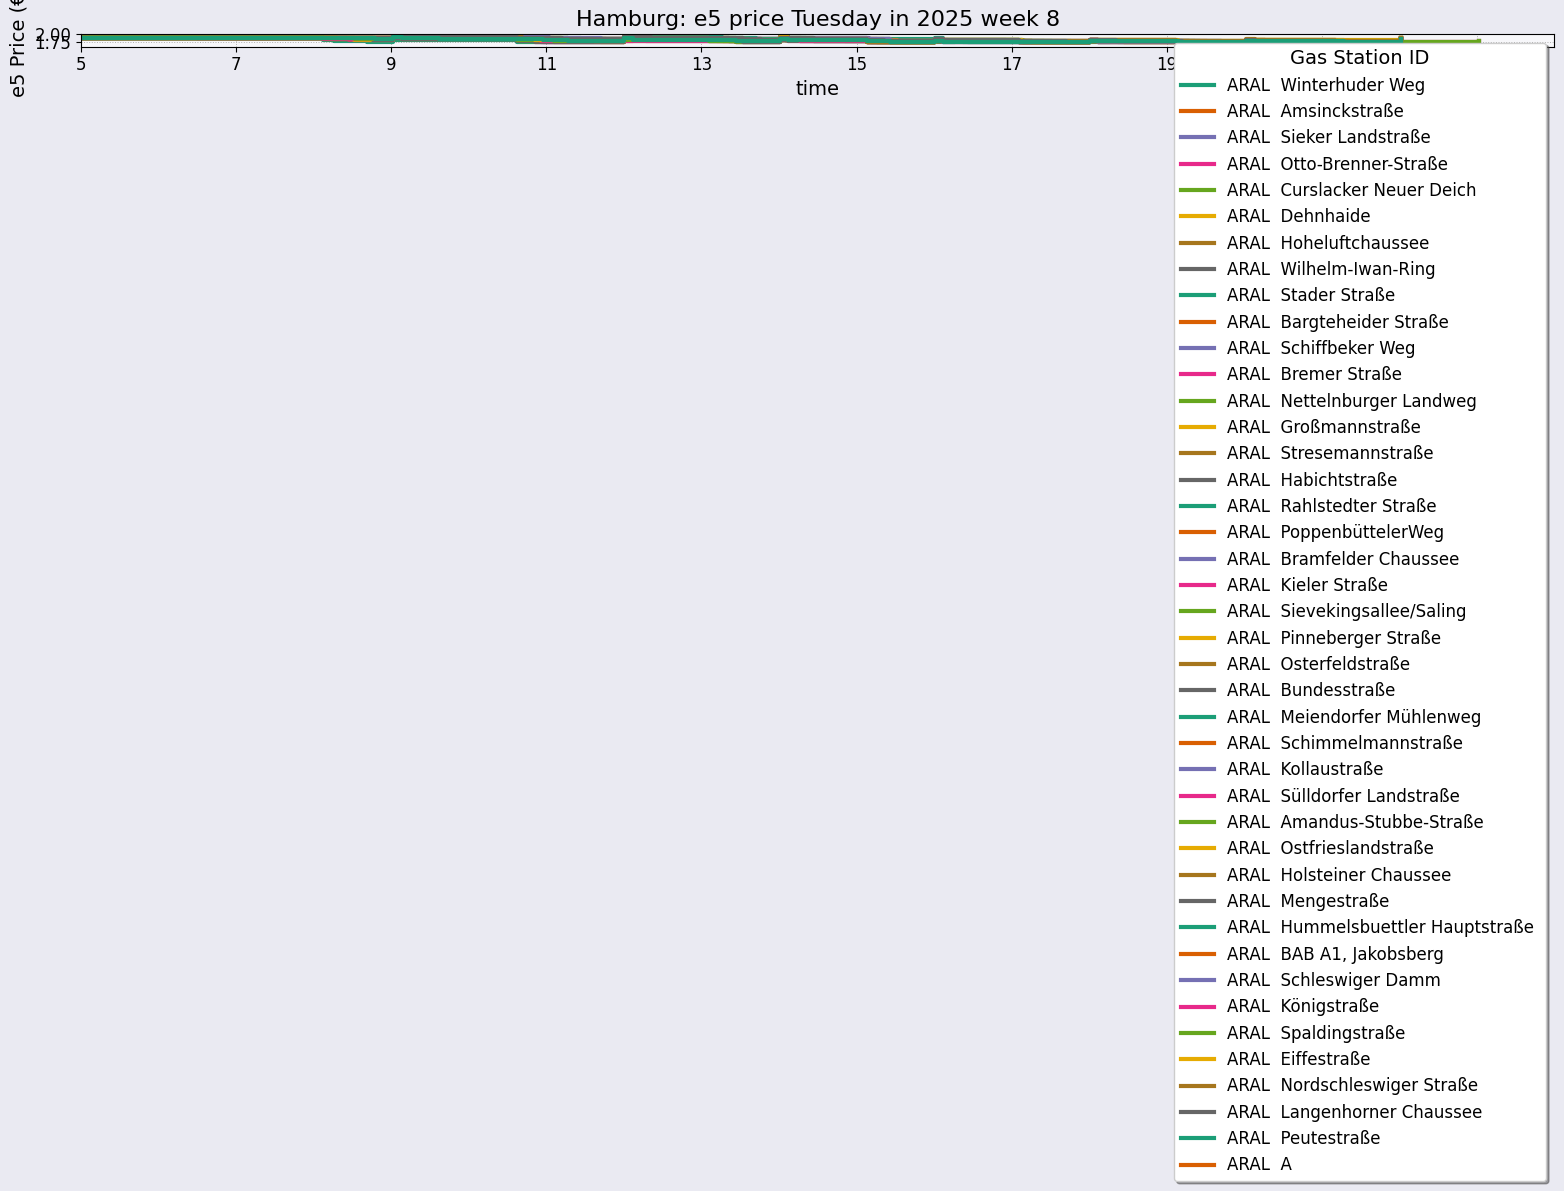

In [ ]:
plot_diffstat(df_hh,2025,8,'Tuesday', list(df_hh[df_hh['brand']== 'ARAL']['station_uuid'].unique()), analyzer = 'e5')

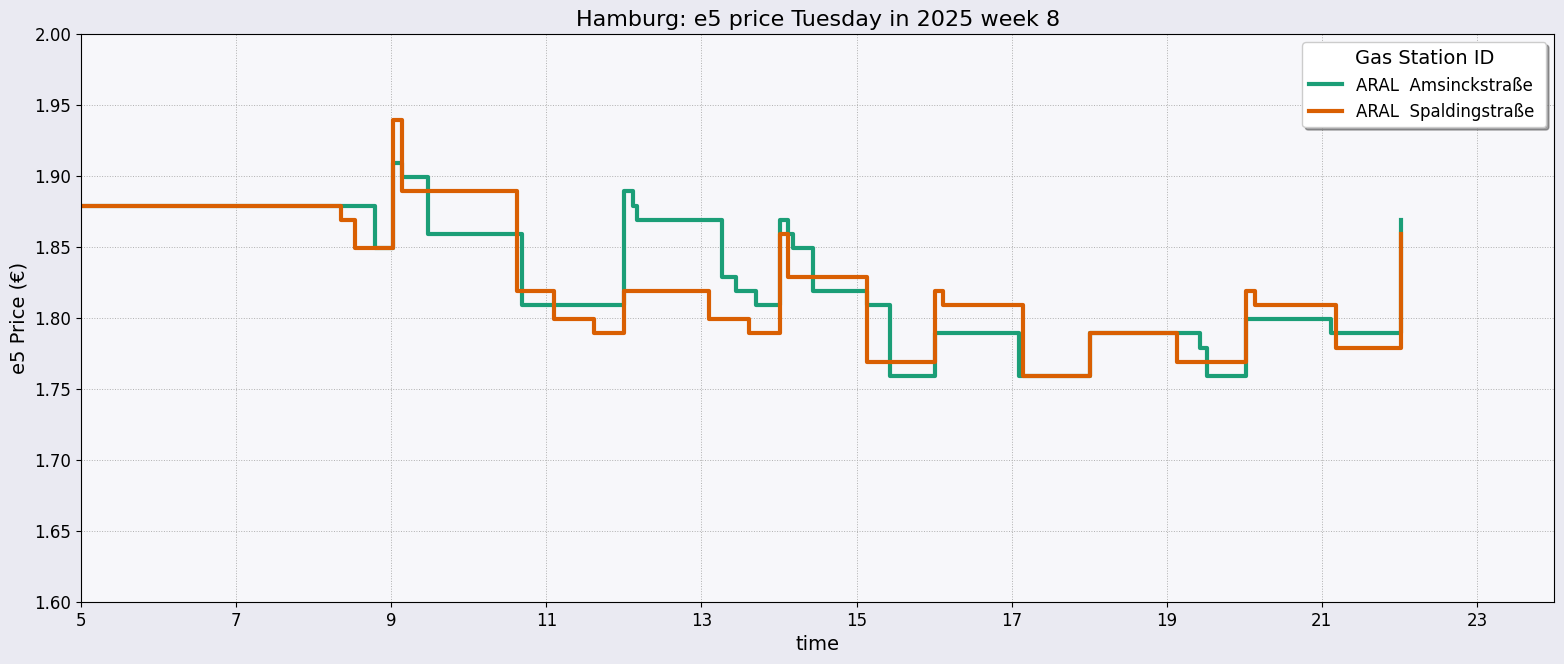

In [ ]:
plot_diffstat(df_hh,2025,8,'Tuesday', list(df_hh[(df_hh['brand']== 'ARAL')&(df_hh['post_code']== '20097')]['station_uuid'].unique()), analyzer = 'e5')

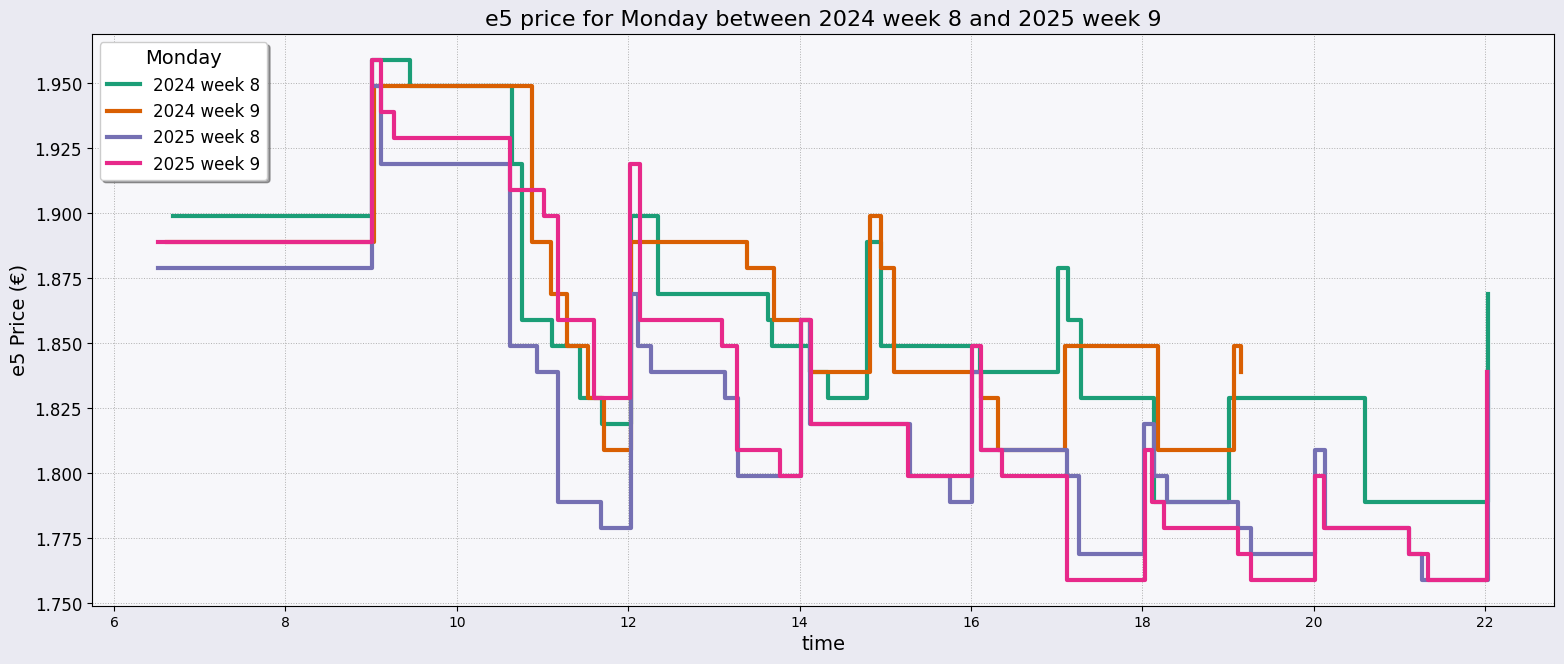

In [ ]:
plot_comp_days(df_fw,'Monday',2024, 2025, 8,9,'f97bcef8-619c-4ac4-bf9d-35995dea884e','e5')

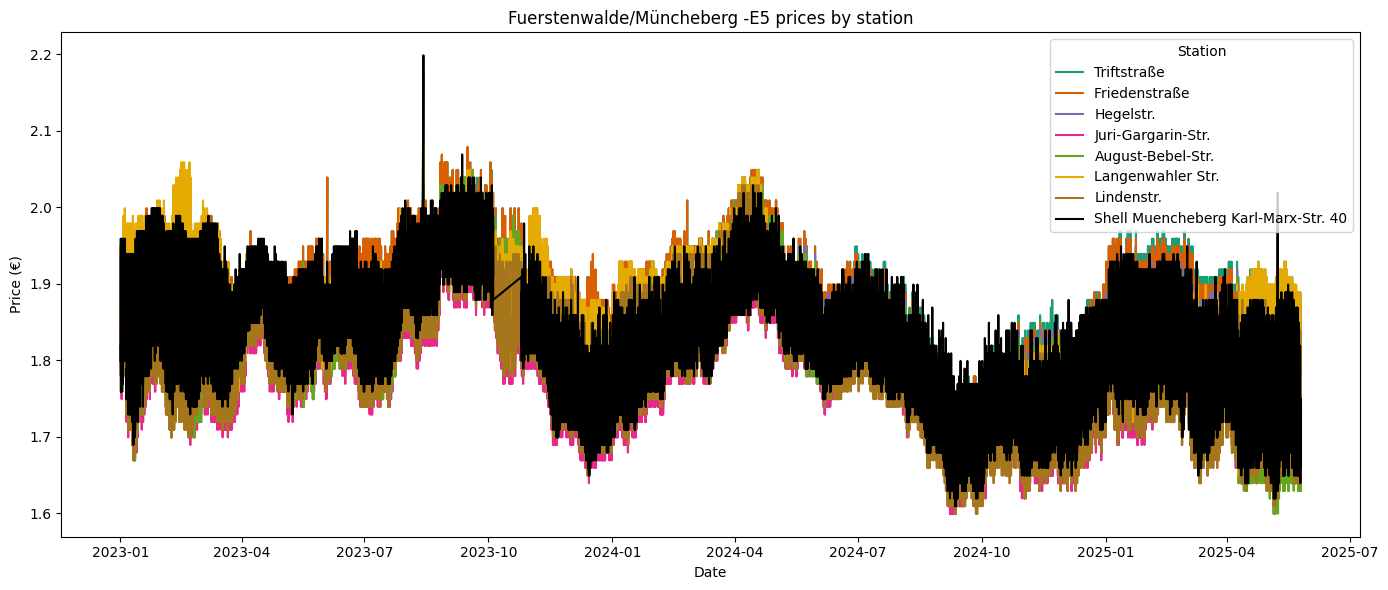

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_fw, x='date', y='e5', hue='street', legend='full', palette='Dark2')
sns.lineplot(data=df_mb, x='date', y='e5', hue='name', legend='full', palette=['black'])
plt.title("Fuerstenwalde/Müncheberg -E5 prices by station")
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend(title='Station')
plt.tight_layout()
plt.show()

In [ ]:
fig = px.line(df_mb, x="date", y="e5", title="Fuel Price Over Time")
fig.update_layout(
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Price (€/L)",
    width=1800,
    height=1000,
    margin=dict(l=40, r=40, t=60, b=40),
    template="plotly_white")